In [1]:
import numpy as np

## Eulers metode

Hvis $t_0$ er gitt og vi numerisk vil løse differensialligningen
$$
\begin{align}
  x'(t) &= f(t,x(t), y(t)), \newline
  y'(t) &= g(t,x(t), y(y))
\end{align}
$$
med
$$x(t_0) = x_0 \quad \text{og} \quad y(t_0) = y_0,$$
da kan vi velge en skrittlengde $\Delta t$, og approksimere $x(t_0 + \Delta t)$ og $y(t_0 + \Delta t)$ med
$$
\begin{align}
  x(t_0 + \Delta t) &\approx x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y(t_0 + \Delta t) &\approx y_0 + g(t_0, x_0, y_0) \cdot \Delta t.
\end{align}
$$
Vi setter nå
$$
\begin{align}
  x_1 &= x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y_1 &= y_0 + g(t_0, x_0, y_0) \cdot \Delta t,
\end{align}
$$
og $t_1 = t_0 + \Delta t$.
Vi fortsetter på denne måten. Etter å ha funnet $x_0, x_1, \dots, x_n$ og
$y_0, y_1, \dots, y_n$ setter vi
$$
\begin{align}
  x_{n+1} &= x_n + f(t_n, x_n, y_n) \cdot \Delta t \newline
  y_{n+1} &= y_n + g(t_n, x_n, y_n) \cdot \Delta t,
\end{align}
$$
der $t_n = t_0 + n \Delta t$.

## Funksjon som anvender Eulers metode på et system av differensialligninger

In [2]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]
  y_values = [y0]
  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])
    # Legger til de nye verdiene i listene
    x_values.append(x_next)
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

### Vi anvender den nye Eulers metode funksjonen på vårt eksempel

In [125]:
def F(x, y):
    return x**2 / 2 - 2*x*y + 3*y**2 - 2*y

In [122]:
def minus_dFdx(t, x, y):
  return -(x - 2*y)

def minus_dFdy(t, x, y):
    return -(-2*x + 6*y - 2)

In [127]:
# Definerer initialbetingelser og parametere
t0 = 0   # Starttidspunkt
x0 = 0  # Startverdi for x
y0 = 0   # Startverdi for y
tn = 100   # Slutt-tidspunkt
n = 1000  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(minus_dFdx, minus_dFdy, t0, tn, x0, y0, n)

In [128]:
x_values[-1], y_values[-1]

(np.float64(1.9999999999998548), np.float64(0.999999999999949))

In [129]:
F(x_values[-1], y_values[-1])

np.float64(-0.9999999999999998)

In [130]:
import matplotlib.pyplot as plt

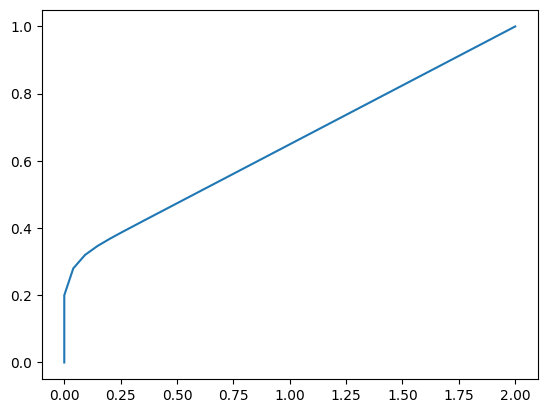

In [131]:
plt.plot(x_values, y_values)

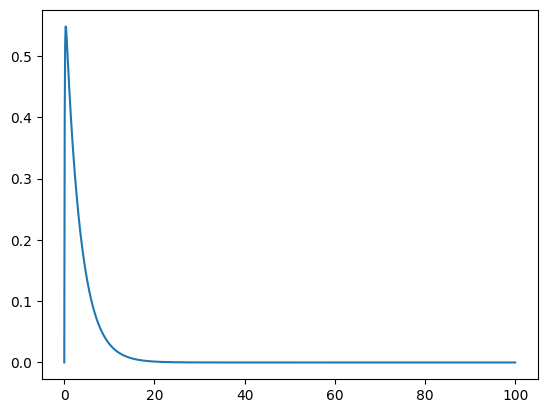

In [132]:
plt.plot(t_values, minus_dFdx(1, x_values, y_values))

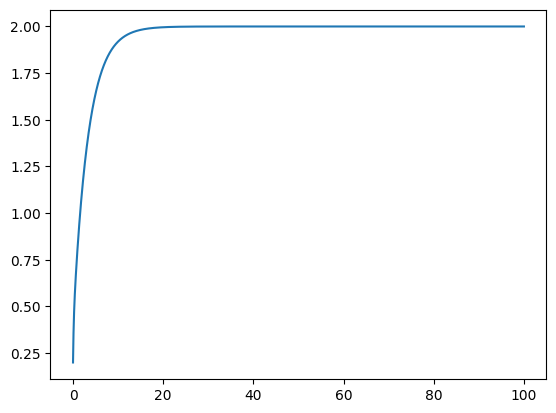

In [121]:
plt.plot(t_values, x_values)